In [1]:
import sys
sys.path.append('../input/timm-pytorch-image-models/pytorch-image-models-master')

In [2]:
from fastai.vision.all import *
from collections import Counter

In [3]:
ds_path = Path('../input/animals10/raw-img')
files = [f for f in ds_path.glob('*/*')]
labels = [f.parent.stem for f in files]
Counter(labels)

Counter({'cavallo': 2623,
         'pecora': 1820,
         'elefante': 1446,
         'gatto': 1668,
         'scoiattolo': 1862,
         'gallina': 3098,
         'ragno': 4821,
         'mucca': 1866,
         'cane': 4863,
         'farfalla': 2112})

In [4]:
translations = {"cane": "dog", 
             "cavallo": "horse", 
             "elefante": "elephant",
             "farfalla": "butterfly",
             "gallina": "chicken",
             "gatto": "cat", 
             "mucca": "cow", 
             "pecora": "sheep", 
             "scoiattolo": "squirrel",
             "ragno": "spider"
            }

In [5]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    splitter = RandomSplitter(),
    get_items = get_image_files,
    get_y= lambda f: translations[f.parent.stem],
    item_tfms = Resize(384),
    batch_tfms = aug_transforms(size=224,)
)

In [6]:
dls = animals.dataloaders(ds_path)

In [7]:
len(dls.train_ds), len(dls.valid_ds)

(20944, 5235)

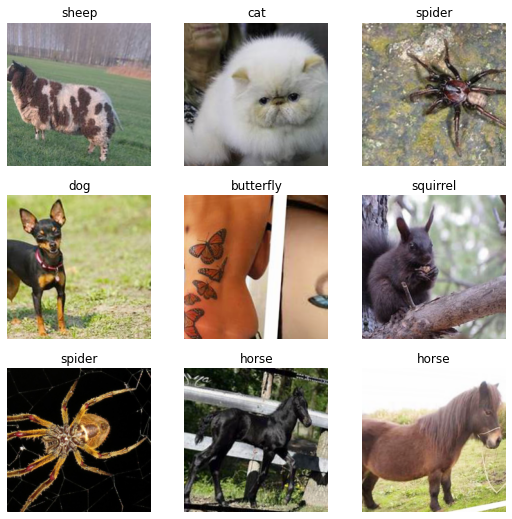

In [8]:
dls.show_batch()

In [9]:
dls.vocab

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

In [10]:
learner = vision_learner(dls, 'resnet10t')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet10t_176_c3-f3215ab1.pth" to /root/.cache/torch/hub/checkpoints/resnet10t_176_c3-f3215ab1.pth


In [11]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,time
0,0.380298,0.173404,03:20


epoch,train_loss,valid_loss,time
0,0.258176,0.146341,02:51


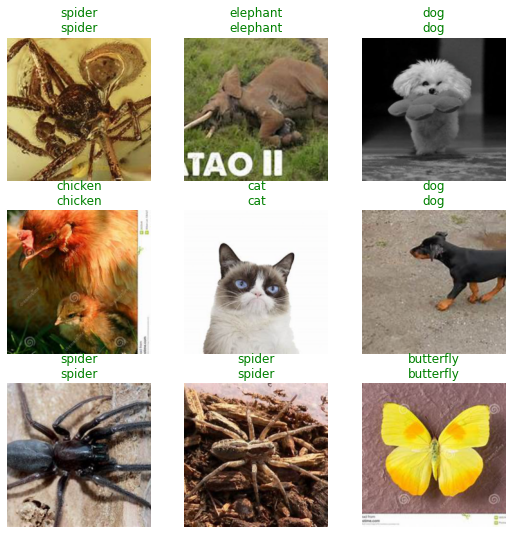

In [12]:
learner.show_results()

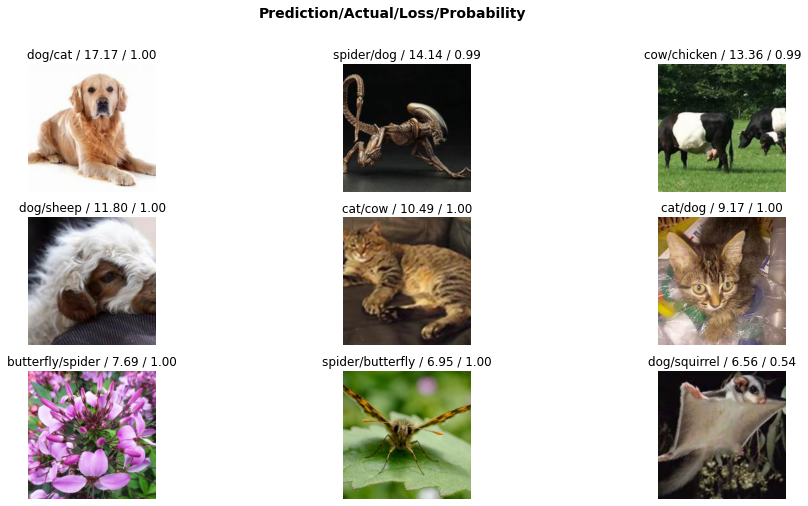

In [13]:
interpreter = Interpretation.from_learner(learner)
interpreter.plot_top_losses(9, figsize=(16,8))

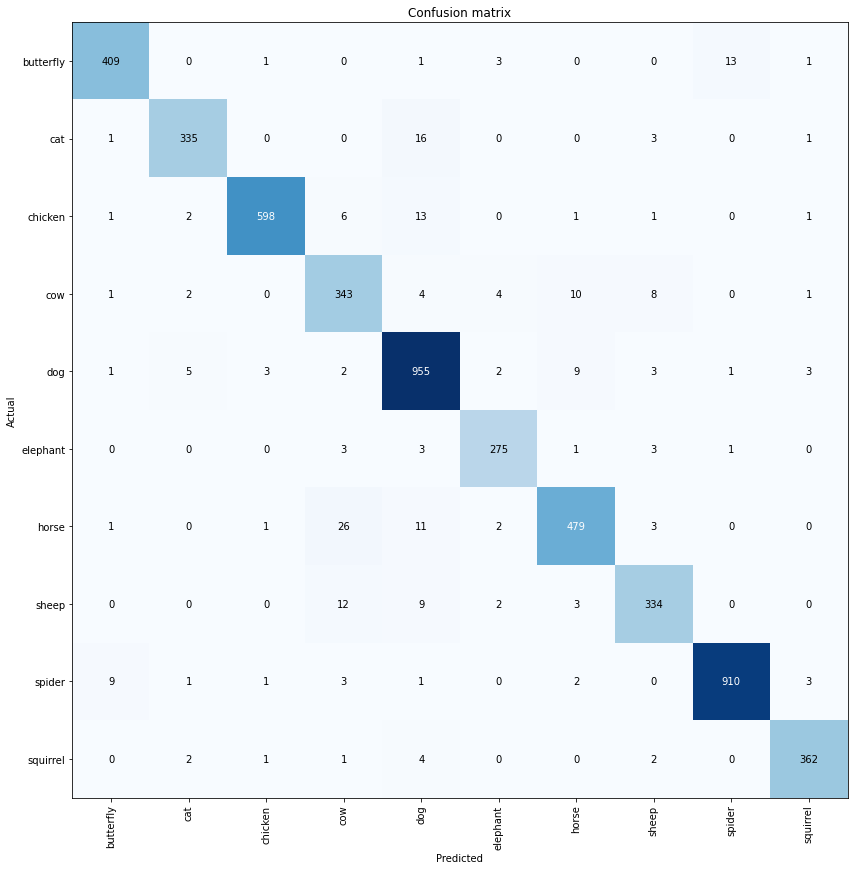

In [14]:
classification_interpreter = ClassificationInterpretation.from_learner(learner)
classification_interpreter.plot_confusion_matrix(figsize=(12,12))

In [15]:
classification_interpreter.most_confused()

[('horse', 'cow', 26),
 ('cat', 'dog', 16),
 ('butterfly', 'spider', 13),
 ('chicken', 'dog', 13),
 ('sheep', 'cow', 12),
 ('horse', 'dog', 11),
 ('cow', 'horse', 10),
 ('dog', 'horse', 9),
 ('sheep', 'dog', 9),
 ('spider', 'butterfly', 9),
 ('cow', 'sheep', 8),
 ('chicken', 'cow', 6),
 ('dog', 'cat', 5),
 ('cow', 'dog', 4),
 ('cow', 'elephant', 4),
 ('squirrel', 'dog', 4),
 ('butterfly', 'elephant', 3),
 ('cat', 'sheep', 3),
 ('dog', 'chicken', 3),
 ('dog', 'sheep', 3),
 ('dog', 'squirrel', 3),
 ('elephant', 'cow', 3),
 ('elephant', 'dog', 3),
 ('elephant', 'sheep', 3),
 ('horse', 'sheep', 3),
 ('sheep', 'horse', 3),
 ('spider', 'cow', 3),
 ('spider', 'squirrel', 3),
 ('chicken', 'cat', 2),
 ('cow', 'cat', 2),
 ('dog', 'cow', 2),
 ('dog', 'elephant', 2),
 ('horse', 'elephant', 2),
 ('sheep', 'elephant', 2),
 ('spider', 'horse', 2),
 ('squirrel', 'cat', 2),
 ('squirrel', 'sheep', 2),
 ('butterfly', 'chicken', 1),
 ('butterfly', 'dog', 1),
 ('butterfly', 'squirrel', 1),
 ('cat', 'butter